<a href="https://colab.research.google.com/github/DaseiN-461/DaseiN-461/blob/main/accelerometer_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pylab as plt

In [26]:
# Model of relative error % of sensor
def error(chi,wn,w):   
  w_wn = w/wn
  t1 = (1-(w_wn)**2)**2
  t2 = (2*chi*w_wn)**2
  e = (1/((t1+t2)**(1/2))) - 1
  return e


# Model of displacement
def displacement(y,wn,w,e):
  x = ((w**2)*y*(e+1))/(wn**2)
  return x

# Model of precision
def precision(e):
  p = 1 - abs(e)
  return (p)

# Simulate for every frequency in array w_arange
def simulation(wn,chi,y,w_arange):
  
  e = []
  x = []
  p = []

  for w in w_arange:
    e.append(error(chi,wn,w))
    x.append(displacement(y,wn,w,error(chi,wn,w)))
    p.append(precision(error(chi,wn,w)))
    
  return [np.array(e)*100,np.array(x)*1e3,np.array(p)*100] # Return [x : displacement in [mm], e : relative error in [%], p : precision in [%]]

# Simulate for every chi in array chi_arange

def simulate_for_chi(chi_arange): 
      for_chi_results = []

      for chi in chi_arange:
        for_chi_results.append(simulation(wn,chi,y,w_arange))
      return for_chi_results



In [60]:
# Generate plots for every chi in chi_arange

def plot_simulations(chi_arange,lims):
  # Generate the legends
  chi_legends = []
  for chi in chi_arange:
    chi_legends.append(str(chi))

  # Do simulations
  for_chi_results = simulate_for_chi(chi_arange)

  # Plot the results

  # Limits of plots for
    # Error
  e_lims = lims[0]
  #
  e_xlim = e_lims[0]
  e_ylim = e_lims[1]
    # Dispacement
  x_lims = lims[1]
  #
  x_xlim = x_lims[0]
  x_ylim = x_lims[1]
    # Precision
  p_lims = lims[2]
  #
  p_xlim = p_lims[0]
  p_ylim = p_lims[1]

  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                                                            # Plot the error in the sensor measurement
  plt.figure(1,figsize=(15, 5))
  for chi in for_chi_results:
    e = chi[0]
    plt.plot(w_arange,e)

  # Setup figure
  plt.title('Error relativo porcentual del acelerómetro')
  plt.xlabel('Frecuencias relativas [Hz]')
  plt.ylabel('Error [%]')
  plt.legend(chi_legends)
  plt.grid()
  plt.xlim(e_xlim)
  plt.ylim(e_ylim)

  # Plot horizontal line at 0.5 % of error to define a tolerance range
  plt.hlines(0.5,0,int(e_xlim[1]))
  plt.hlines(-0.5,0,int(e_xlim[1]))

  # Plot vertical line at 25 Hz
  plt.vlines(25,int(e_ylim[0]),int(e_ylim[1]))

  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                                                                    # Plot the displacement
  plt.figure(2,figsize=(15, 5))
  for chi in for_chi_results:
    x = chi[1]

    plt.plot(w_arange,x)

  # Setup figure
  plt.title('Desplazamiento del acelerómetro')
  plt.xlabel('Frecuencias relativas [Hz]')
  plt.ylabel('Desplazamiento del acelerómetro [mm]')
  plt.legend(chi_legends)
  plt.grid()
  plt.xlim(x_xlim)
  plt.ylim(x_ylim)

  # Plot vertical line at 25 Hz
  plt.vlines(25,int(x_ylim[0]),int(x_ylim[1]))

  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                                                                      # Plot the precision
  plt.figure(3,figsize=(15, 5))
  
  for chi in for_chi_results:
    p = chi[2]

    plt.plot(w_arange,p)


  # Setup figure
  plt.title('Precisión del acelerómetro')
  plt.xlabel('Frecuencias relativas [Hz]')
  plt.ylabel('Precisión [%]')
  plt.legend(chi_legends)
  plt.grid()
  plt.xlim(p_xlim)
  plt.ylim(p_ylim)

  # Plot horizontal line at 99.25 % of precision to define a tolerance range
  plt.hlines(99.75,0,int(p_xlim[1]))
  
  # Plot vertical line at 25 Hz
  plt.vlines(25,int(p_ylim[0]),int(p_ylim[1]))

  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [56]:
########################################################################################################################
########################################################################################################################
########################################################################################################################
#Parameters of simulations

wn = 100        # Natural frequency
y = 0.15e-3     # Absolute movement

# Array range of damping rate to simulate

chi_arange = np.array([0.6,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.74,0.76,0.8])  

# Array range of relative frequency to simulate

w_start = 0
w_end = 200
w_step = 1

w_arange = np.arange(w_start,w_end,w_step)

# Graphs limits
e_xlim = [0,50]
e_ylim = [-1,1]

x_xlim = [0,200]
x_ylim = [0,0.16]

p_xlim = [0,50]
p_ylim = [98.5,100]

########################################################################################################################
########################################################################################################################
########################################################################################################################
# Generate the limits array
e_lims = [e_xlim, e_ylim]
x_lims = [x_xlim, x_ylim]
p_lims = [p_xlim, p_ylim]

lims = [e_lims,x_lims,p_lims]



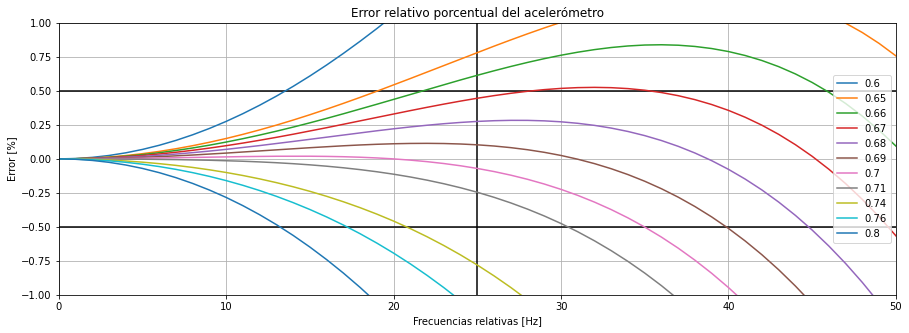

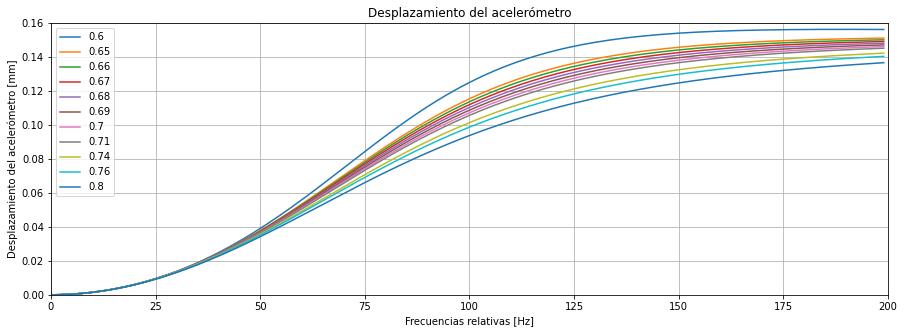

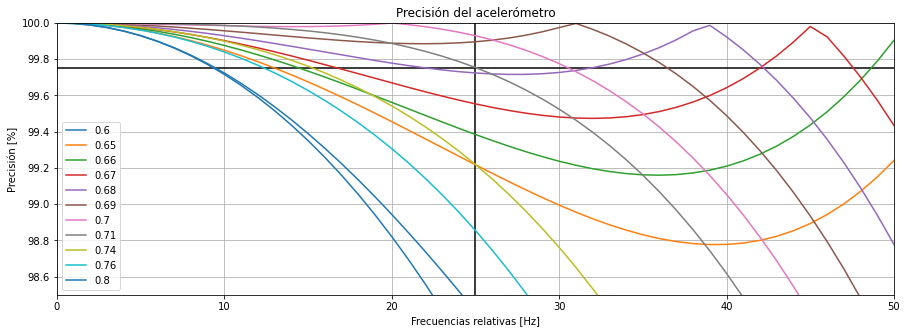

In [61]:
plot_simulations(chi_arange,lims)